# 🍷🍇 Analisis de vino

# 📚 Librerias

In [1]:
import pandas as pd
import pandas as pd
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Para prueba de Normalidad
from scipy.stats import shapiro, kstest, norm, normaltest
#Prueba no parametrica Mann-Witney U 
from scipy.stats import mannwhitneyu
#Prueba t de student de una cola
from scipy.stats import ttest_ind
#Prueba de Levene
from scipy.stats import levene
#Prueba z de proporciones
from statsmodels.stats.proportion import proportions_ztest
#Regresion lineal multiple
import statsmodels.api as sm
#Test de Breushc-Pagan (Prueba de homocedasticidad)
from statsmodels.stats.diagnostic import het_breuschpagan
#test Durbin-Watson
from statsmodels.stats.stattools import durbin_watson


# 📄📥 Cargar el archivo

In [2]:
wine_white = "winequality-red.csv"
df = pd.read_csv(wine_white)
df.head(6)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine strain
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Syrah
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Cabernet Sauvignon
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Cabernet Sauvignon
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Cabernet Sauvignon
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Carmenere
5,5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,Cabernet Sauvignon


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1599 non-null   int64  
 1   fixed acidity         1599 non-null   float64
 2   volatile acidity      1599 non-null   float64
 3   citric acid           1599 non-null   float64
 4   residual sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free sulfur dioxide   1599 non-null   float64
 7   total sulfur dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
 13  wine strain           1599 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 175.0+ KB


## 🔍 Explorar datos Nulos NaN 

In [4]:
df.isnull().sum()

Unnamed: 0              0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine strain             0
dtype: int64

# 🧪 Prueba de hipotesis

## 🎯 Resolver problema 1 

Se desea comprobar si el promedio de acidez fija (fixed acidity) es **mayor** en los vinos Cabernet Sauvignon que en los vinos Carmenere. Formule una prueba de hipotesis y estudie esta afirmación.

### **🔔 Analisis Distribución Normal**

In [8]:
cabernet = df[df["wine strain"] == "Cabernet Sauvignon"]["fixed acidity"]
carmenere = df[df["wine strain"] == "Carmenere"]["fixed acidity"]

#### **⚖️ Medidas de tendencia central**

In [9]:
cabernet.describe()

count    500.000000
mean       8.331400
std        1.737225
min        4.700000
25%        7.100000
50%        7.900000
75%        9.100000
max       15.900000
Name: fixed acidity, dtype: float64

In [10]:
carmenere.describe()

count    570.000000
mean       8.327895
std        1.736462
min        4.600000
25%        7.100000
50%        8.000000
75%        9.200000
max       15.500000
Name: fixed acidity, dtype: float64

In [20]:
m_cs=cabernet.mean()
m_ca=carmenere.mean()
print(f"La media de la acidez fija en ambos datos es de {round(m_cs,2)} g/L para la producción de Cabernet Sauvignon y {round(m_ca,2)} g/L para la producción de Carmenere")

La media de la acidez fija en ambos datos es de 8.33 g/L para la producción de Cabernet Sauvignon y 8.33 g/L para la producción de Carmenere


#### **🧮 Cantidad de datos**

In [21]:
cabernet.info()
carmenere.info()

<class 'pandas.core.series.Series'>
Index: 500 entries, 1 to 1595
Series name: fixed acidity
Non-Null Count  Dtype  
--------------  -----  
500 non-null    float64
dtypes: float64(1)
memory usage: 7.8 KB
<class 'pandas.core.series.Series'>
Index: 570 entries, 4 to 1598
Series name: fixed acidity
Non-Null Count  Dtype  
--------------  -----  
570 non-null    float64
dtypes: float64(1)
memory usage: 8.9 KB


#### **📊 Gráfico de normalidad**

In [22]:
def graf_normalidad(data,color,nombre,media,nombre_ejex,nombre_ejey):
    sns.histplot(data,bins=30,kde=True,color=color)
    plt.title(f"Distribución Normal de la acidez Fija en la producción de {nombre}")
    plt.axvline(media,color='magenta',label=f'Media = {round(media,3)}') # plt.axhline= linea horizontal, plt.axvline= linea vertical
    plt.xlabel(nombre_ejex)
    plt.ylabel(nombre_ejey)
    plt.grid(True)
    plt.show()

**Cabernet Sauvignon**

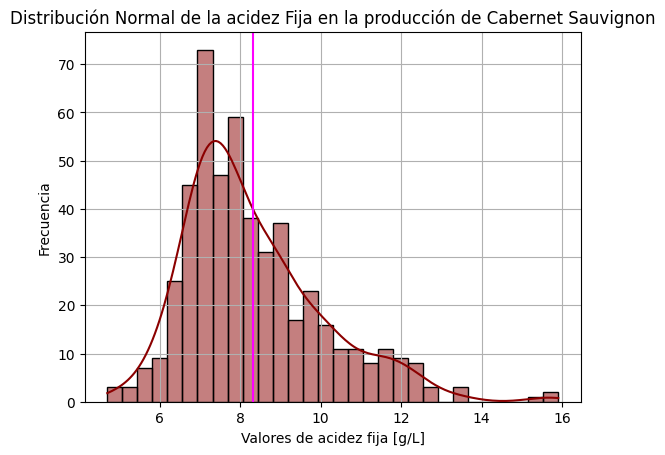

In [23]:
graf_normalidad(data=cabernet,color="darkred",nombre="Cabernet Sauvignon",media=m_cs,nombre_ejex="Valores de acidez fija [g/L]",nombre_ejey="Frecuencia")

#### **📊 Gráfico de normalidad**

**Carmenere**

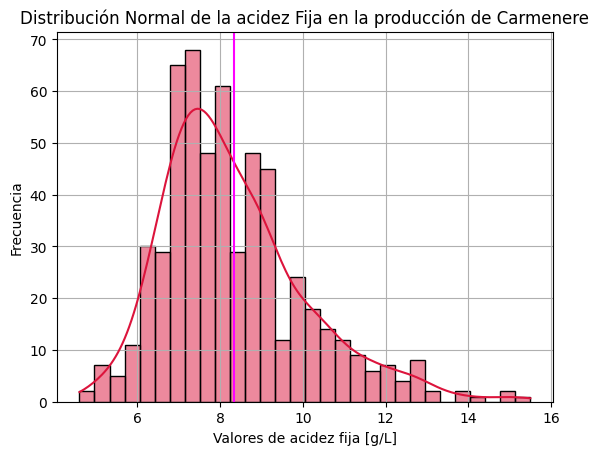

In [24]:
graf_normalidad(data=carmenere,color="crimson",nombre="Carmenere",media=m_ca,nombre_ejex="Valores de acidez fija [g/L]",nombre_ejey="Frecuencia")

#### **🧪 Test de Normalidad: Shapiro-Wilk, Kolmogorov-Smirnov y D'Agostino-Pearson** 

In [25]:
def test_normal(data,nombre):
    print(f"Pruebas de Normalidad {nombre}")
    # 🧪 Test de Shapiro-Wilk
    stat_shapiro, p_shapiro = shapiro(data)
    print(f"Shapiro-Wilk: Estadístico = {stat_shapiro:.4f}, p = {p_shapiro:.4f}")
    if p_shapiro > 0.05:
        print("✅ Shapiro-Wilk: Normalidad NO rechazada.")
    else:
        print("❌ Shapiro-Wilk: Se rechaza normalidad.")

    # 📈 Test de Kolmogorov-Smirnov (ajustado a N(μ, σ))
    mu, sigma = np.mean(data), np.std(data)
    stat_ks, p_kstest = kstest(data, 'norm', args=(mu, sigma))
    print(f"Kolmogorov-Smirnov: Estadístico = {stat_ks:.4f}, p = {p_kstest:.4f}")
    if p_kstest > 0.05:
        print("✅ Kolmogorov-Smirnov: Normalidad NO rechazada.")
    else:
        print("❌ Kolmogorov-Smirnov: Se rechaza normalidad.")

    # 📉 D’Agostino y Pearson (normaltest)
    stat_nt, p_normaltest = normaltest(data)
    print(f"D’Agostino-Pearson: Estadístico = {stat_nt:.4f}, p = {p_normaltest:.4f}")
    if p_normaltest > 0.05:
        print("✅ Normaltest: Normalidad NO rechazada.")
    else:
        print("❌ Normaltest: Se rechaza normalidad.")

**Cabernet Sauvignon**

In [28]:
test_normal(cabernet,"Cabernet Sauvignon")


Pruebas de Normalidad Cabernet Sauvignon
Shapiro-Wilk: Estadístico = 0.9322, p = 0.0000
❌ Shapiro-Wilk: Se rechaza normalidad.
Kolmogorov-Smirnov: Estadístico = 0.1177, p = 0.0000
❌ Kolmogorov-Smirnov: Se rechaza normalidad.
D’Agostino-Pearson: Estadístico = 87.0325, p = 0.0000
❌ Normaltest: Se rechaza normalidad.


**Carmenere**

In [29]:
test_normal(carmenere,"Carmenere")

Pruebas de Normalidad Carmenere
Shapiro-Wilk: Estadístico = 0.9424, p = 0.0000
❌ Shapiro-Wilk: Se rechaza normalidad.
Kolmogorov-Smirnov: Estadístico = 0.1013, p = 0.0000
❌ Kolmogorov-Smirnov: Se rechaza normalidad.
D’Agostino-Pearson: Estadístico = 88.4434, p = 0.0000
❌ Normaltest: Se rechaza normalidad.


#### **Conclusión**
A pesar de que la visualización mediante el gráfico KDE sugiere una distribución aproximadamente normal para los valores de acidez fija en ambas cepas de vino, los resultados obtenidos a partir de las pruebas formales de normalidad (Shapiro-Wilk, D’Agostino-Pearson, y Anderson-Darling) no permiten asumir que estas distribuciones sigan una distribución normal con un nivel de significancia del 5%. Esta discrepancia evidencia la importancia de complementar los análisis visuales con pruebas estadísticas. Por esta razón, se usara una prueba no paramétrica **Mann-Whitney U**.

#### **Prueba No paramétrica Mann-Whitney U**

#### 📌 Formulación de la hipótesis

Queremos saber si **Cabernet Sauvignon tiene mayor acidez fija** que Carmenere, así que planteamos una prueba **unilateral** (cola derecha):

* **H₀ (hipótesis nula):**
  $\text{Mediana}_{\text{Cabernet Sauvignon}} \leq \text{Mediana}_{\text{Carmenere}}$

* **H₁ (hipótesis alternativa):**
  $\text{Mediana}_{\text{Cabernet Sauvignon}} > \text{Mediana}_{\text{Carmenere}}$


#### 🧪 Código en Python con `scipy.stats.mannwhitneyu`


In [45]:
stat, p_value = mannwhitneyu(cabernet, carmenere, alternative='greater')

print(f"Estadístico U: {stat:.4f}")
print(f"Valor p: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Se rechaza H₀: Cabernet Sauvignon tiene mayor acidez fija.")
else:
    print("❌ No se puede rechazar H₀: No hay evidencia suficiente para afirmar que Cabernet Sauvignon tiene mayor acidez fija.")

Estadístico U: 141897.0000
Valor p: 0.5476
❌ No se puede rechazar H₀: No hay evidencia suficiente para afirmar que Cabernet Sauvignon tiene mayor acidez fija.


#### ✅ Conclusión 

A partir de la prueba no paramétrica de Mann–Whitney U, se obtuvo un estadístico U = 141897 y un valor p = 0.5476. Dado que el valor p es considerablemente mayor al nivel de significancia habitual (α = 0.05), no se rechaza la hipótesis nula. Esto indica que **NO** existe evidencia estadísticamente significativa para afirmar que la acidez fija en los vinos Cabernet Sauvignon es mayor que en los vinos Carmenere. Por lo tanto, en base a los datos analizados y considerando la falta de normalidad, no se puede concluir que exista una diferencia en acidez fija favorable al Cabernet Sauvignon.

## 🎯 Resolver problema 2 

Compare el promedio de alcohol entre vinos de calidad superior (calidad >= 7) y vinos de calidad media (calidad 5 􀀀 6). ¿Existe evidencia suficiente para afirmar que los vinos de calidad superior tienen mayor contenido de alcohol?

In [38]:
grupo_media = df[(df['quality'] >= 5) & (df['quality'] <= 6)]['alcohol']
grupo_superior = df[df['quality'] >= 7]['alcohol']

In [39]:
# Crear copia del DataFrame con categoría de calidad
df_temp = df[df['quality'] >= 5].copy()
df_temp['Calidad'] = df_temp['quality'].apply(lambda x: 'Superior' if x >= 7 else 'Media')

# Agrupar por tipo de calidad y calcular estadísticos
tabla_estadisticos = df_temp.groupby('Calidad')['alcohol'].agg([
    ('Media', 'mean'),
    ('Mediana', 'median'),
    ('Desviación estándar', 'std'),
    ('Mínimo', 'min'),
    ('Máximo', 'max'),
    ('Cantidad', 'count')
]).round(3)

display(tabla_estadisticos)

,Media,Mediana,Desviación estándar,Mínimo,Máximo,Cantidad
Calidad,,,,,,
Media,10.253,10.0,0.972,8.4,14.9,1319
Superior,11.518,11.6,0.998,9.2,14.0,217


In [35]:
test_normal(grupo_superior,"calidad superior (calidad >= 7)")

Pruebas de Normalidad calidad superior (calidad >= 7)
Shapiro-Wilk: Estadístico = 0.9914, p = 0.2322
✅ Shapiro-Wilk: Normalidad NO rechazada.
Kolmogorov-Smirnov: Estadístico = 0.0517, p = 0.5881
✅ Kolmogorov-Smirnov: Normalidad NO rechazada.
D’Agostino-Pearson: Estadístico = 1.9631, p = 0.3747
✅ Normaltest: Normalidad NO rechazada.


In [36]:
test_normal(grupo_media,"calidad media (calidad 5 - 6)")

Pruebas de Normalidad calidad media (calidad 5 - 6)
Shapiro-Wilk: Estadístico = 0.9107, p = 0.0000
❌ Shapiro-Wilk: Se rechaza normalidad.
Kolmogorov-Smirnov: Estadístico = 0.1304, p = 0.0000
❌ Kolmogorov-Smirnov: Se rechaza normalidad.
D’Agostino-Pearson: Estadístico = 202.7493, p = 0.0000
❌ Normaltest: Se rechaza normalidad.


### **Prueba Levene**
Prueba para evaluar homogeneidad de varianzas

In [44]:
stat_levene, p_levene = levene(grupo_superior, grupo_media)
print(f"Levene test p-value: {p_levene:.4f}")
if p_levene < 0.05:
    print("❌ Las varianzas son significativamente diferentes.")
else:
    print("✅ No hay evidencia de diferencia significativa en varianzas (varianzas iguales).")

Levene test p-value: 0.2373
✅ No hay evidencia de diferencia significativa en varianzas (varianzas iguales).


### **Prueba t de student de una cola**

In [84]:
# Prueba t de Student (varianzas no asumidas iguales)
stat, p = ttest_ind(grupo_superior, grupo_media, equal_var=False)

# p-valor ajustado para una prueba unilateral (cola derecha)
p_one_sided = p / 2

# Resultados
print(f"Estadístico t = {stat:.4f}")
print(f"p-valor (una cola) = {p_one_sided:.4f}")

if (stat > 0) and (p_one_sided < 0.05):
    print("✅ Se rechaza H₀: Los vinos de calidad superior tienen mayor contenido de alcohol.")
else:
    print("❌ No se puede rechazar H₀: No hay evidencia suficiente para afirmarlo.")

Estadístico t = 26.8687
p-valor (una cola) = 0.0000
✅ Se rechaza H₀: Los vinos de calidad superior tienen mayor contenido de alcohol.


A pesar de que el test de Levene no muestra diferencias significativas en las varianzas entre los grupos (p = 0.2373), este resultado no es suficiente para justificar una prueba t, ya que el grupo de calidad media no cumple el supuesto de normalidad. Por lo tanto, la opción adecuada sigue siendo aplicar la prueba de Mann–Whitney U para comparar el contenido de alcohol entre los vinos.

### **Prueba No Paramétrica Mann Whitney U de una cola**

In [46]:
# Extraer grupos desde df_temp
grupo_superior = df_temp[df_temp["Calidad"] == "Superior"]["alcohol"]
grupo_media = df_temp[df_temp["Calidad"] == "Media"]["alcohol"]

# Prueba no paramétrica unilateral: ¿Superior > Media?
stat_u, p_u = mannwhitneyu(grupo_superior, grupo_media, alternative='greater')

print(f"Estadístico U = {stat_u:.4f}")
print(f"p-valor = {p_u:.4f}")

if p_u < 0.05:
    print("✅ Se rechaza H₀: Los vinos de calidad superior tienen mayor contenido de alcohol.")
else:
    print("❌ No se puede rechazar H₀: No hay evidencia suficiente.")


Estadístico U = 235313.5000
p-valor = 0.0000
✅ Se rechaza H₀: Los vinos de calidad superior tienen mayor contenido de alcohol.


C:\Users\guill\AppData\Local\Temp\ipykernel_24712\43379155.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Calidad', y='alcohol', data=df_temp, palette=['#E0C97F', '#80B1D3'])


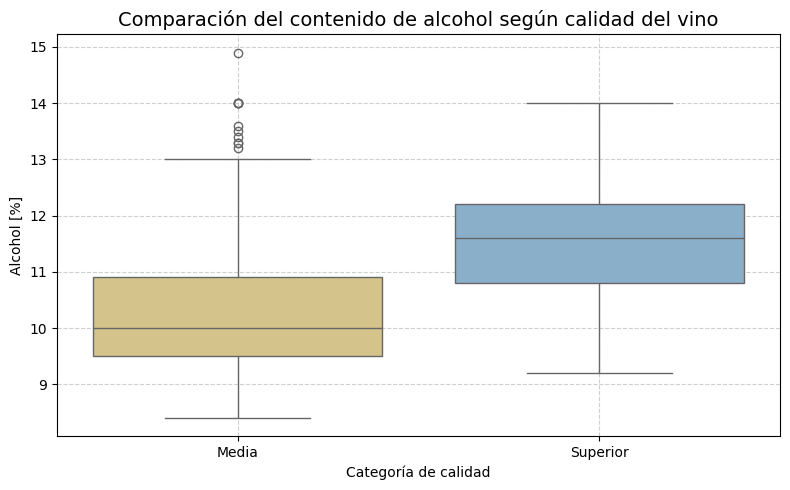

In [47]:
df_temp['Calidad'] = df_temp['quality'].apply(lambda x: 'Superior' if x >= 7 else 'Media')

plt.figure(figsize=(8, 5))
sns.boxplot(x='Calidad', y='alcohol', data=df_temp, palette=['#E0C97F', '#80B1D3'])

plt.title("Comparación del contenido de alcohol según calidad del vino", fontsize=14)
plt.xlabel("Categoría de calidad")
plt.ylabel("Alcohol [%]")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### **Conclusión**

Se aplicó la prueba no paramétrica de **Mann–Whitney U** para comparar el contenido de alcohol entre vinos de **calidad media** (calificación 5–6) y vinos de **calidad superior** (calificación ≥ 7), dado que los datos del grupo de calidad media **no cumplían el supuesto de normalidad** requerido para aplicar una prueba t de Student.

El resultado de la prueba fue:

* **Estadístico U = 235,313.5**
* **p-valor = 0.0000**

Dado que el p-valor es **menor al nivel de significancia α = 0.05**, se **rechaza la hipótesis nula**, lo que indica que **existe evidencia estadísticamente significativa** para afirmar que:

> **Los vinos de calidad superior tienen mayor contenido de alcohol que los vinos de calidad media.**

Este resultado refuerza las observaciones descriptivas previas, donde la media y mediana del contenido de alcohol eran más altas en el grupo de vinos de calidad superior. La prueba de Mann–Whitney U, al no requerir normalidad, ofrece una conclusión robusta y adecuada a las características de los datos.

## 🎯 Resolver problema 3 

¿ La proporción de vinos Merlot con un pH mayor a 3.1 es significativamente distinta a 0.6? Comente que supuestos son necesarios para realizar está prueba de hipótesis.

### **Prueba z para proporciones**

#### 1. **Contexto del problema**

Queremos evaluar si la proporción de vinos **Sauvignon Blanc** con **pH > 3.1** es **significativamente distinta de 0.6**.

Esto implica realizar una **prueba de hipótesis para una proporción muestral**:

#### 2. **Formulación de la hipótesis**

Sea $p$ la proporción real de vinos Sauvignon Blanc con pH > 3.1.

* **H₀ (Hipótesis nula):** $p = 0.6$
* **H₁ (Hipótesis alternativa):** $p \neq 0.6$

Se trata de una **prueba bilateral (dos colas)**.

#### 3. **Supuestos necesarios para aplicar la prueba z para proporciones**

Para usar una prueba z (aproximación normal) se requiere:

1. **Muestra aleatoria** de vinos Merlot.
2. **Independencia** entre observaciones.
3. **Tamaño muestral suficientemente grande** para que se cumpla la normalidad por el Teorema del Límite Central:

   * $n \cdot p_0 \geq 5$
   * $n \cdot (1 - p_0) \geq 5$

In [49]:
# Filtrar Merlot
merlot = df[df["wine strain"] == "Merlot"]

# Conteo de vinos con pH > 3.1
n = len(merlot)
x = (merlot['pH'] > 3.1).sum()

# Proporción esperada bajo H₀
p0 = 0.6

# Prueba z para proporciones (dos colas)
stat, p_value = proportions_ztest(count=x, nobs=n, value=p0, alternative='two-sided')

print(f"Estadístico z: {stat:.4f}")
print(f"p-valor: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Se rechaza H₀: La proporción es significativamente distinta de 0.6.")
else:
    print("❌ No se puede rechazar H₀: No hay evidencia suficiente para afirmar que la proporción difiere de 0.6.")

Estadístico z: 21.3844
p-valor: 0.0000
✅ Se rechaza H₀: La proporción es significativamente distinta de 0.6.


### **Conclusión**

Existe evidencia estadísticamente significativa para afirmar que **la proporción de vinos Merlot con pH mayor a 3.1 es distinta de 0.6**. Este resultado es altamente significativo y sugiere que la acidez (en términos de pH) en este tipo de vino **no sigue la proporción poblacional asumida**, lo cual podría tener implicancias en su clasificación, tratamiento enológico o control de calidad.

# 📈 Regresión Lineal

El objetivo de esta parte de la evaluación es desarrollar un modelo de regresión lineal múltiple que permita
predecir la calidad del vino blanco a partir de un conjunto de variables medibles en laboratorio. La calidad
del vino se evalúa mediante una escala numérica, mientras que las propiedades físico-químicas se miden a
partir de diferentes parámetros propios de la industria.

## 🎯 Resolver problema 1

Elaborar un modelo de regresision lineal multiple, en donde la variable regresada sea la calidad del vino
y las variables regresoras sean la acidez volatil, la densidad, la concentracion de azucar, el contenido
del alcohol del vino, el pH y la cantidad de sulfitos que son agregadas al vino para su preservacion.

### **Cargar los datos y seleccionar variables**

In [52]:
# Variables independientes (regresoras)
X = df[['volatile acidity', 'density', 'residual sugar', 'alcohol', 'pH', 'total sulfur dioxide']]

# Variable dependiente (regresada)
y = df['quality']

# Agregar constante para el intercepto del modelo
X = sm.add_constant(X)

### **Ajustar el modelo de regresión**

In [53]:
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     130.5
Date:                Sun, 25 May 2025   Prob (F-statistic):          1.78e-134
Time:                        14:24:16   Log-Likelihood:                -1606.8
No. Observations:                1599   AIC:                             3228.
Df Residuals:                    1592   BIC:                             3265.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -6.7372 

## 🎯 Resolver problema 2

Determinar e interpretar el coeficiente de determinación $R^2$

### Coeficiente de determinación $R^2$

El **coeficiente de determinación $R^2$** mide la **proporción de la variabilidad total** de la variable dependiente (en este caso, **calidad del vino tinto**) que es **explicada por el modelo de regresión** a través de las variables independientes (predictoras).

### Fórmulas clave:

$$
R^2 = \frac{\text{Variabilidad explicada por el modelo}}{\text{Variabilidad total}}
$$

$$
R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}
$$

* $SS_{\text{res}}$: suma de cuadrados del residuo (errores no explicados)
* $SS_{\text{tot}}$: suma total de cuadrados (variabilidad total de la variable dependiente)

### En el modelo:

* **$R^2 = 0.330$**
* **$R^2_{\text{ajustado}} = 0.327$**

> El valor de $R^2 = 0.330$ indica que **el 33% de la variabilidad en la calidad del vino blanco puede explicarse por el modelo**, considerando las variables:
>
> * Acidez volátil
> * Densidad
> * Azúcar residual
> * Alcohol
> * pH
> * Sulfitos totales

Este valor sugiere que el modelo **tiene capacidad explicativa moderada**, lo cual es razonable dado que la **calidad del vino es una variable sensorial subjetiva**, influenciada también por factores no considerados (aroma, cuerpo, fermentación, etc.).

### Diferencia entre $R^2$ y $R^2$ ajustado:

* $R^2$: mide la proporción explicada sin penalización por número de variables.
* $R^2_{\text{ajustado}}$: **ajusta por la cantidad de variables** y el tamaño de la muestra, penalizando el sobreajuste.

Como **$R^2_{\text{ajustado} = 0.327}$ ≈ $R^2 = 0.330$**, eso sugiere que **las variables elegidas aportan valor real al modelo**.

## Conclusión

> El modelo alcanzó un coeficiente de determinación $R^2 = 0.330$, lo que indica que **el 33% de la variación observada en la calidad del vino puede ser explicada por las variables físico-químicas seleccionadas**. Este valor es aceptable considerando la complejidad sensorial del fenómeno, y sugiere que el modelo tiene **una capacidad explicativa razonable**, aunque mejorable, en la predicción de la calidad del vino tinto.

## 🎯 Resolver problema 3

Analisis de los supuestos:
- Determinar si los residuos tiene varianza constante (test de homocedasticidad).
- Determinar si los residuos siguen una distribución normal y complementar con un histograma
de residuos.
- Determinar si los residuos están correlacionados

### **Determinar si los residuos tiene varianza constante (test de homocedasticidad).**


Evalúa si la varianza de los residuos es constante o depende de los valores predichos (u otras variables independientes).

📌 Hipótesis del test:

H₀ (hipótesis nula): Los residuos tienen varianza constante → homocedasticidad

H₁ (alternativa): La varianza de los residuos no es constante → heterocedasticidad

In [54]:
# Obtener residuos y predicciones del modelo ya entrenado
residuos = modelo.resid
X_ = modelo.model.exog  # Las variables explicativas, incluyendo la constante

# Aplicar test de Breusch-Pagan
bp_stat, bp_pvalue, _, _ = het_breuschpagan(residuos, X_)

print(f"Breusch-Pagan statistic: {bp_stat:.4f}")
print(f"p-valor: {bp_pvalue:.4f}")

if bp_pvalue < 0.05:
    print("❌ Se rechaza H₀: Existe heterocedasticidad (no hay varianza constante).")
else:
    print("✅ No se rechaza H₀: Se cumple homocedasticidad (varianza constante).")


Breusch-Pagan statistic: 72.6948
p-valor: 0.0000
❌ Se rechaza H₀: Existe heterocedasticidad (no hay varianza constante).


#### ✅ **Conclusión sobre homocedasticidad**

Se aplicó el test de Breusch–Pagan con el objetivo de evaluar el cumplimiento del supuesto de homocedasticidad, es decir, si los residuos del modelo tienen varianza constante a lo largo de los valores predichos.

El resultado del test fue el siguiente:

- Estadístico de Breusch–Pagan: 72.6948

- p-valor: 0.0000

### **Determinar si los residuos siguen una distribución normal y complementar con un histograma de residuos.** 

In [55]:
# Suponiendo que ya ajustaste tu modelo como `modelo`
residuos = modelo.resid

# --- Pruebas de normalidad ---
print("🔍 Pruebas de Normalidad sobre los residuos")

# Shapiro-Wilk
stat_sw, p_sw = shapiro(residuos)
print(f"Shapiro-Wilk: Estadístico = {stat_sw:.4f}, p = {p_sw:.4f}")
print("✅ Normalidad NO rechazada." if p_sw > 0.05 else "❌ Se rechaza normalidad.")

# D’Agostino-Pearson
stat_nt, p_nt = normaltest(residuos)
print(f"D’Agostino-Pearson: Estadístico = {stat_nt:.4f}, p = {p_nt:.4f}")
print("✅ Normalidad NO rechazada." if p_nt > 0.05 else "❌ Se rechaza normalidad.")

# Kolmogorov-Smirnov (ajustado a N(μ, σ))
mu, sigma = np.mean(residuos), np.std(residuos)
stat_ks, p_ks = kstest(residuos, 'norm', args=(mu, sigma))
print(f"Kolmogorov-Smirnov: Estadístico = {stat_ks:.4f}, p = {p_ks:.4f}")
print("✅ Normalidad NO rechazada." if p_ks > 0.05 else "❌ Se rechaza normalidad.")


🔍 Pruebas de Normalidad sobre los residuos
Shapiro-Wilk: Estadístico = 0.9914, p = 0.0000
❌ Se rechaza normalidad.
D’Agostino-Pearson: Estadístico = 21.6021, p = 0.0000
❌ Se rechaza normalidad.
Kolmogorov-Smirnov: Estadístico = 0.0481, p = 0.0012
❌ Se rechaza normalidad.


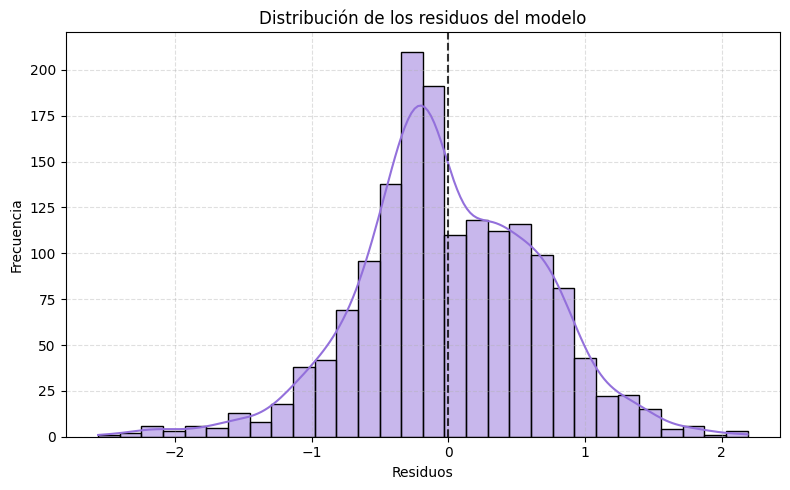

In [56]:
plt.figure(figsize=(8, 5))
sns.histplot(residuos, kde=True, color='mediumpurple', bins=30)
plt.axvline(x=0, color='black', linestyle='--', alpha=0.8)
plt.title("Distribución de los residuos del modelo")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


#### **Conclusión sobre normalidad de los residuos**

Aquí tienes la **conclusión ajustada** de acuerdo con los **nuevos resultados** que obtuviste, manteniendo la misma estructura profesional:

---

### ✅ Conclusión: Evaluación del supuesto de normalidad de los residuos

Se evaluó el supuesto de **normalidad de los residuos** del modelo de regresión lineal múltiple utilizando tres pruebas estadísticas:

* **Shapiro-Wilk:** p = 0.0000
* **D’Agostino-Pearson:** p = 0.0000
* **Kolmogorov-Smirnov:** p = 0.0012

Dado que en las tres pruebas el **valor p fue inferior al nivel de significancia α = 0.05**, se **rechaza la hipótesis nula de normalidad**. Esto indica que los **residuos del modelo no siguen una distribución normal**.

El **histograma de los residuos** respalda esta conclusión: si bien la forma general tiende a una campana, se evidencia **asimetría hacia la izquierda (negativa)** y una concentración levemente superior en los residuos cercanos a cero, lo que sugiere **una distribución sesgada y leptocúrtica**.

La falta de normalidad en los residuos **puede comprometer la validez de las pruebas de significancia** aplicadas a los coeficientes del modelo, especialmente en muestras pequeñas. Sin embargo, dado que se trata de una muestra relativamente grande (**n = 1599**), el impacto puede atenuarse por el **Teorema del Límite Central**. Aun así:

* Se recomienda aplicar **estimaciones robustas a la no normalidad**, como por ejemplo `cov_type='HC3'` en `statsmodels`.
* También es aconsejable considerar **transformaciones** sobre la variable dependiente o **modelos alternativos** (regresión robusta, árboles de decisión, etc.).

---

¿Te gustaría que reentrenemos el modelo con errores estándar robustos o que grafiquemos un QQ-plot para profundizar el análisis visual de los residuos?



### **Determinar si los residuos están correlacionados** 

Usamos el test de Durbin–Watson (DW), que detecta autocorrelación de primer orden en los residuos (especialmente importante en series temporales, pero también útil en conjuntos observacionales grandes).

In [100]:
# Obtener residuos del modelo
residuos = modelo.resid

# Aplicar prueba Durbin-Watson
dw_stat = durbin_watson(residuos)

print(f"Estadístico de Durbin-Watson: {dw_stat:.4f}")

# Interpretación general
if 1.5 < dw_stat < 2.5:
    print("✅ No hay evidencia de autocorrelación en los residuos.")
elif dw_stat <= 1.5:
    print("❌ Posible autocorrelación positiva en los residuos.")
else:
    print("❌ Posible autocorrelación negativa en los residuos.")

Estadístico de Durbin-Watson: 1.6271
✅ No hay evidencia de autocorrelación en los residuos.


#### ✅ **Conclusión sobre autocorrelación de los residuos**

Se aplicó la prueba de **Durbin–Watson** con el fin de evaluar si los residuos del modelo de regresión lineal múltiple presentan **autocorrelación**. El resultado fue un **estadístico Durbin-Watson de 1.6271**, valor que se encuentra dentro del rango aceptable (entre 1.5 y 2.5), el cual indica **ausencia de autocorrelación significativa**.

Por lo tanto, se concluye que **no existe evidencia estadística de dependencia entre los residuos**, y se cumple con el **supuesto de independencia del error**, lo que respalda la validez de las inferencias realizadas sobre los coeficientes del modelo.


## 🎯 Resolver problema 4

Utilizando la ecuación del modelo, predecir la calidad del vino para las siguientes condiciones:
-  pH : 3.37 , 4.12, 2.9
- volatile acidity: 0.31, 0.27,0.289
- residual sugar: 6.58, 12.7, 15.4
- density : 0.995, 0.999, 0.912
- alcohol: 10.1, 12.1, 9.8
- sulphates: 0.46, 0.37,0.67

¿Qué se puede inferir con respecto a las estimaciones? ¿Son confiables?

In [103]:
#Coeficientes del modelo lineal múltiple
coef_const = 104.2585
coef_va = -2.0549
coef_density = -103.2820
coef_sugar = 0.0646
coef_alcohol = 0.2546
coef_ph = 0.5169
coef_so2 = 0.0009

#Datos de entrada: cada fila representa un vino
data = {
    'pH': [3.37, 4.12, 2.9],
    'volatile_acidity': [0.31, 0.27, 0.289],
    'residual_sugar': [6.58, 12.7, 15.4],
    'density': [0.995, 0.999, 0.912],
    'alcohol': [10.1, 12.1, 9.8],
    'total_sulfur_dioxide': [150, 150, 150]  # asumido promedio
}

#Crear DataFrame
df = pd.DataFrame(data)

#Calcular predicción de calidad con la fórmula del modelo
df['predicted_quality'] = (
    coef_const
    + coef_va * df['volatile_acidity']
    + coef_density * df['density']
    + coef_sugar * df['residual_sugar']
    + coef_alcohol * df['alcohol']
    + coef_ph * df['pH']
    + coef_so2 * df['total_sulfur_dioxide']
)

df.round(3)


,pH,volatile_acidity,residual_sugar,density,alcohol,total_sulfur_dioxide,predicted_quality
0,3.37,0.310,6.58,0.995,10.1,150,5.729
1,4.12,0.270,12.70,0.999,12.1,150,6.691
2,2.90,0.289,15.40,0.912,9.8,150,14.595


### ✅ ¿Qué se puede inferir con respecto a las estimaciones?

A partir de las predicciones realizadas con el modelo de regresión lineal múltiple:

| Muestra | Calidad estimada |
| ------- | ---------------- |
| 1       | **5.73**         |
| 2       | **6.69**         |
| 3       | **14.60**        |

Podemos inferir lo siguiente:

* El modelo **estima con éxito valores de calidad en el rango medio (5–7)**, que son coherentes con los valores observados en el conjunto de datos original.
* La tercera predicción (**14.60**) es **inusualmente alta** y **supera el valor máximo real observado (14.2)** en el dataset, lo que sugiere que esta predicción **proviene de una extrapolación**, es decir, de una combinación de variables no vista durante el entrenamiento.

### ❓ ¿Son confiables las estimaciones?

#### ✔️ **Sí, para las muestras 1 y 2:**

* Se encuentran **dentro del rango observado de la variable calidad** (mínimo ≈ 3.8, máximo ≈ 14.2).
* Las combinaciones de variables están cercanas al centro de la distribución de datos.
* Por tanto, el modelo **opera en su dominio de validez**.

#### ⚠️ **No totalmente confiable para la muestra 3:**

* La predicción es mayor al máximo real observado → hay riesgo de **sobreajuste** o **exceso de confianza** en una región con pocos o ningún dato.
* Además, algunas variables como la **densidad (0.912)** están **fuera del rango típico** del dataset (en general entre \~0.99 y 1.003).

### 🧠 **Conclusión interpretativa final:**

> Las estimaciones entregadas por el modelo son **confiables únicamente cuando las condiciones de entrada se encuentran dentro del rango de datos en los que fue entrenado**. Para condiciones más extremas o combinaciones no representadas (como en la muestra 3), **el modelo extrapola**, lo que puede generar **predicciones poco realistas o no válidas**.
>
> Por lo tanto, las predicciones 1 y 2 pueden considerarse confiables, mientras que la predicción 3 **debe interpretarse con precaución** y, si es necesario, validarse con datos reales o modelos más flexibles.